# Telco Churn

## Goal:
* Discover what variables cause customers to churn
* Use drivers to develop a machine learning model to best determine churn

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

import acquire as a
import prepare as p
import explore as e
import modeling as m

## Acquire
* Data acquired from MySQL Codeup Server

* It contained 7043 Rows and 24 Columns before Cleaning.

* Each row represents a customer in the telco data set.

* Each column represents a demographic, what service they have or don't have, what kind of contract they have, how much they are charged, and how they are paying for said services.
        

## Prepare


### Prepare Actions



* Dropped the columns: 'payment_type_id','internet_service_type_id','contract_type_id'

    - These columns are basically duplicates of infor presented in other columns



* Changed 'total_charges' from an object to a float and changed the null values to 0's in the process.

    - Column had nulls for custumers who just joined the past month.




* Dropped the 'customer_id' column

    - Column was unique values that did not add value or utility to the data for the current questions needing answered and already had an easier to read index.



* Cleaned up 'payment_type' column

    - Got rid of the '(automatic)' string that was in the cells. The string did not assist in looking through the data.



* Encoded categorical variables



* Split data into train, validate, and test (56/24/20), stratifying on 'churn_Yes'


  
| Feature | Definition |
|--------|-----------|
|Customer ID| Customer's unique identifier|
|Gender| Customer's gender|
|Senior_Citizen| Whether the customer is a senior citizen or not|
|Partner| Whether the customer has a partner or not|
|Dependents| Whether the customer has dependents or not|
|Tenure| Number of months customer has been with company in whole numbers|
|Online Security| Whether the customer has online security or not|
|Online Backup| Whether the customer has online backup or not|
|Device Protection| Whether the customer has device protection or not|
|Tech Support| Whether the client has tech support or not|
|Churn| Has the customer churned|
|Additional Features| Encoded and values for categorical data and scaled versions continuous data|
   

In [2]:
# acquiring data and prepping data
df = a.get_telco_data()
df = p.clean_telco(df)

## A brief look at the data

In [3]:
df.head()


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


## A summary of the data

In [4]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Explore


### What is the overall Churn currently?

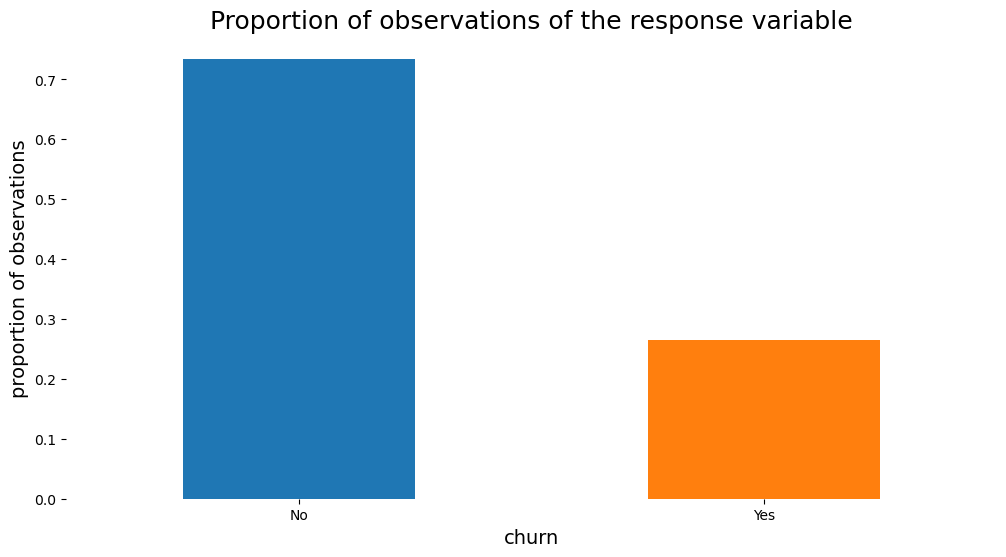

In [5]:
e.plot_churn_overall(df)

In [6]:
# to show percentages of response values
print((df['churn'] == 'No').mean())
print((df['churn'] == 'Yes').mean())

0.7346301292063041
0.2653698707936959


Overall Churn responses show 73.5% No and 26.5% Yes

### What features have the most churn?

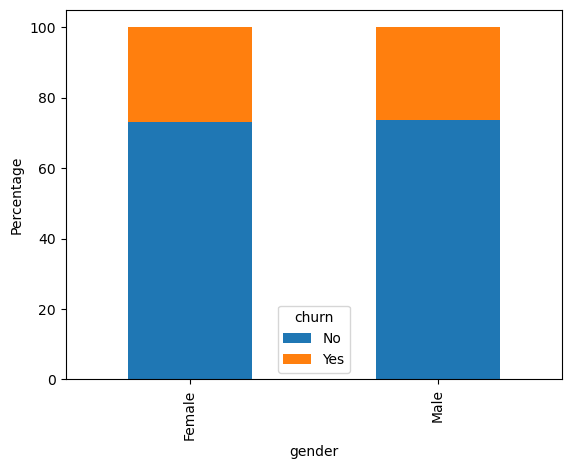

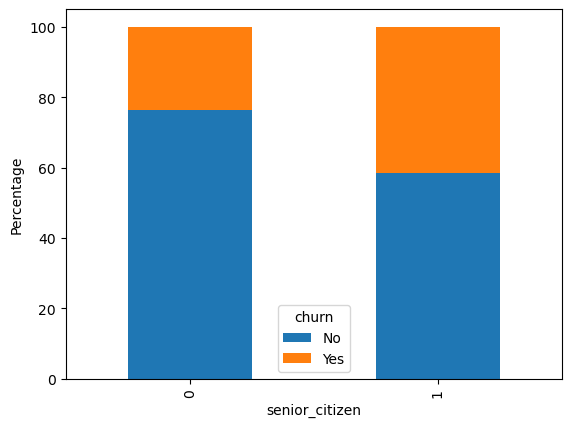

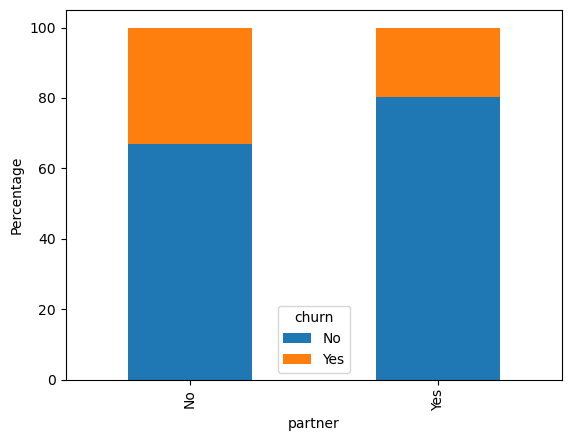

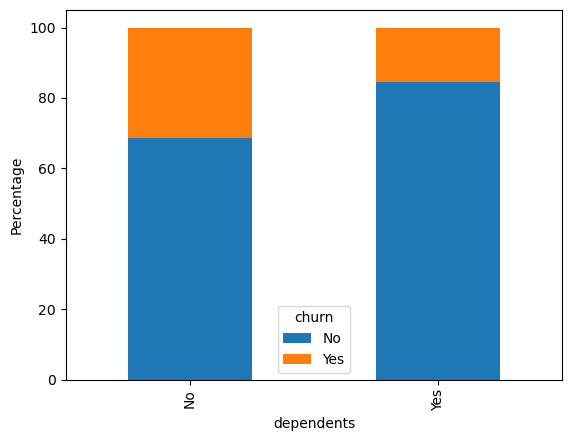

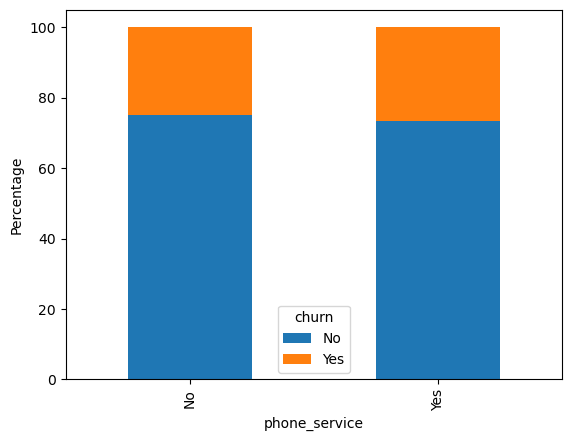

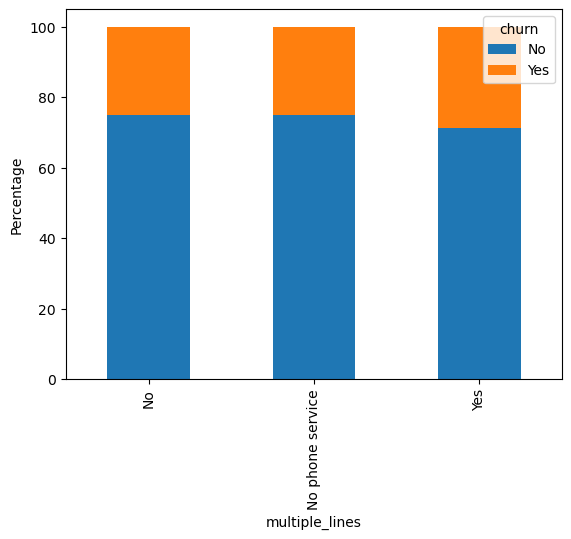

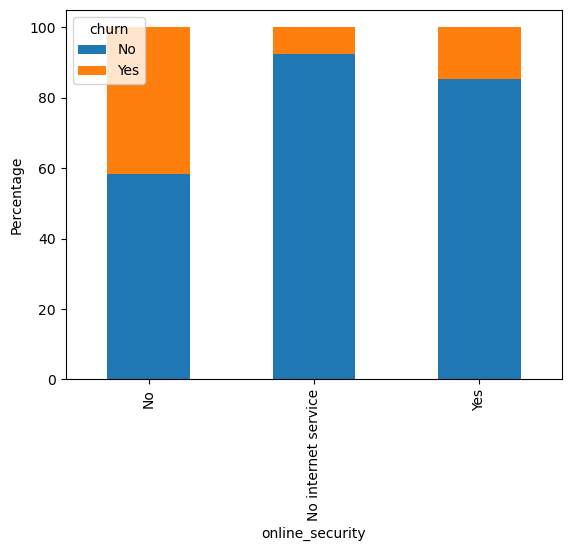

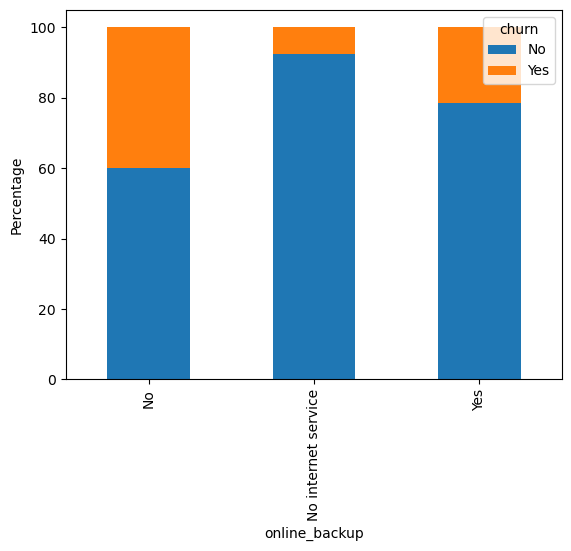

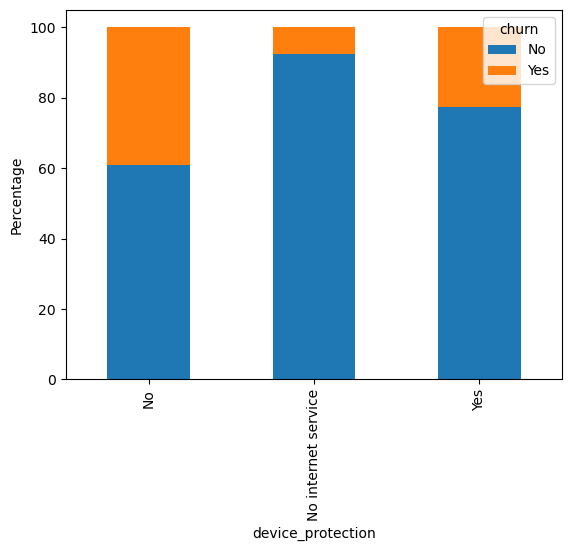

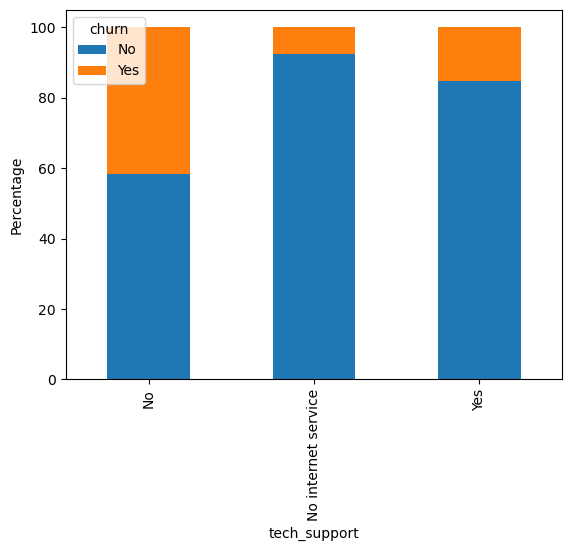

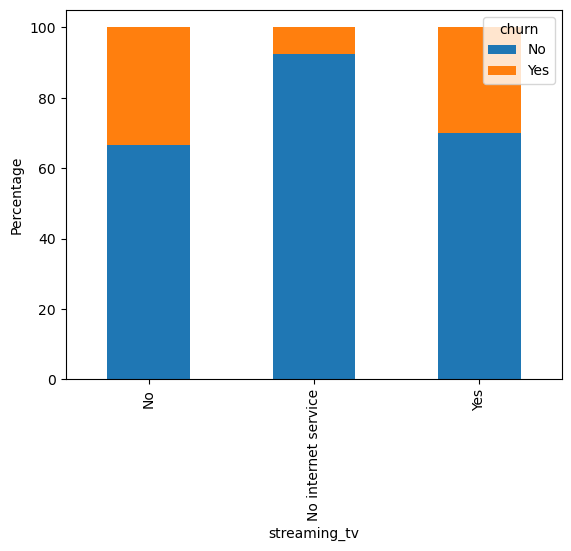

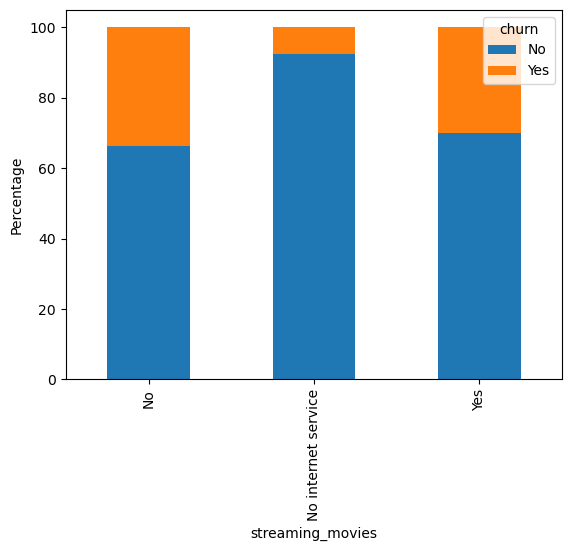

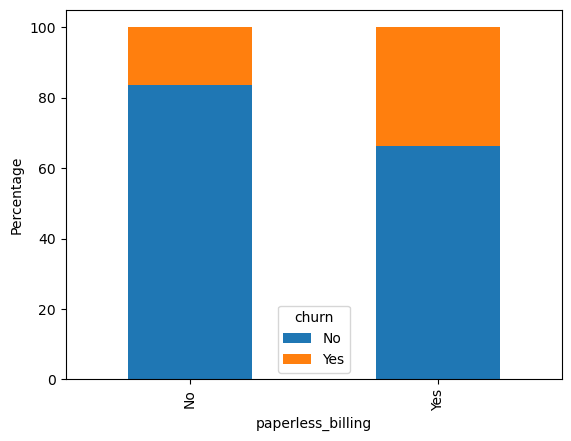

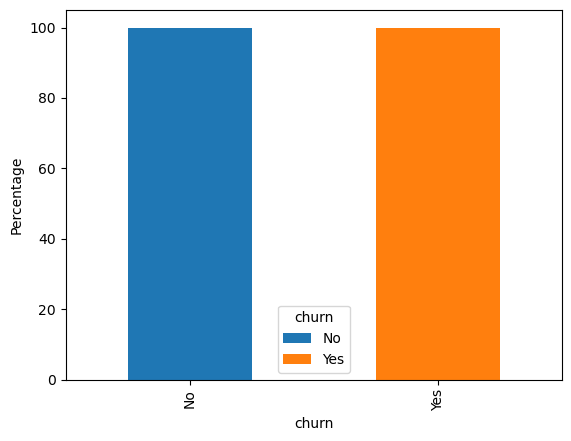

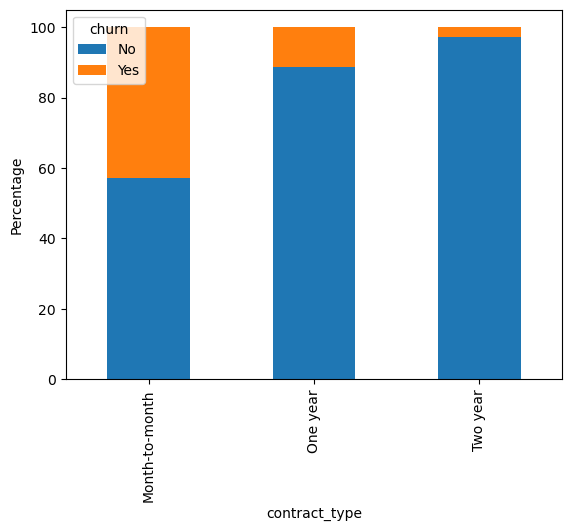

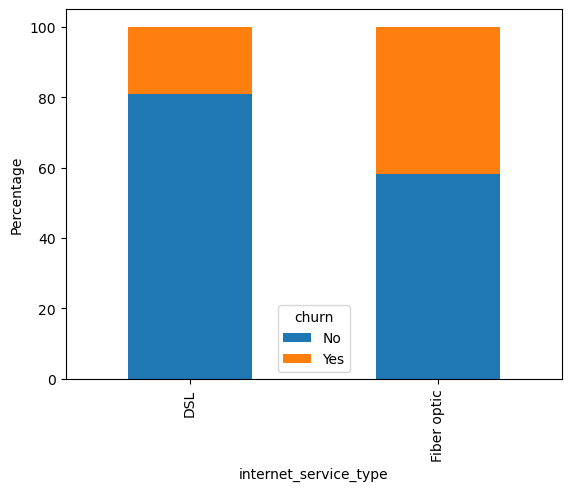

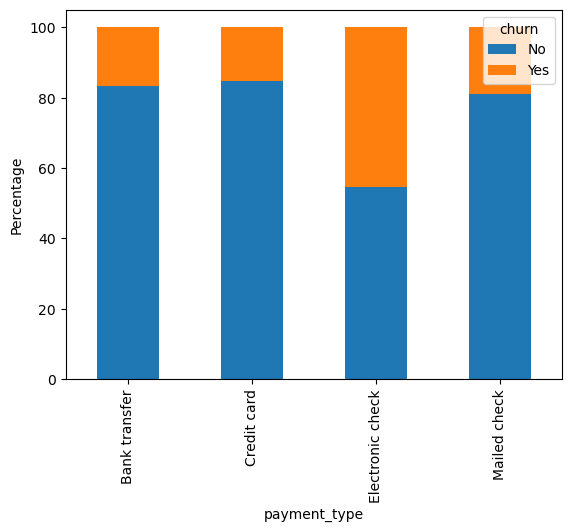

In [7]:
# split categorical and numerical columns
cat_cols, num_cols = e.column_split(df)
# plot categorical columns for visual churn
e.stacked_plot(cat_cols,df)

Most churn: No Online Security, No Online Backup, No Device Protection, No Tech Support, Month-to-Month Contract Types, Fiber Optic Internet Service Type, Electronic Check Payment Types



No significant difference in churn(per visuals): Gender, Partner, Phone Service, Multi Lines, Streaming TV or Movies, Paperless Billing, Auto Payments and Mailed Checks.

### Are these features statistically related?

So I basically took the Services Information, Online Security, Online Backup, Device Protection, and Tech Support, and used a chi-square test to investigate whether 'Churn' was related to them.<br>

I also dropped the customers who did not have internet from the groups.

* I used a confidence interval of 95%
* The resulting alpha is 0.05%

H0: Churn is independent of Online Security.<br>
Ha: Churn and Online Security are related.

In [8]:
# Chi^2 for Online Security
e.get_chi_os(df)

chi^2 = 433.8081
p     = 0.0000


The p-value is less than the alpha. Therefore, we have evidence to support that "Churn" and "Online Security" are related. Based on this and the approximate 20% difference in customers who did not have Online Security compared to those who did, observed in the data above, I believe that using the "Online Security" feature in modeling will likely have a small positive impact on the model's accuracy.

H0: Churn is independent of Online Backup.<br>
Ha: Churn and Online Backup are related.

In [9]:
# Chi^2 for Online Backup 
e.get_chi_ob(df)

chi^2 = 211.2264
p     = 0.0000


The p-value is less than the alpha. Therefore, we have evidence to support that "Churn" and "Online Backup" are related. Based on this and the approximate 20% difference in customers who did not have Online Backup compared to those who did, observed in the data above, I believe that using the "Online Backup" feature in modeling will likely have a small positive impact on the model's accuracy.

H0: Churn is independent of Device Protection.<br>
Ha: Churn and Device Protection are related.

In [10]:
# Chi^2 for Device Protection
e.get_chi_dp(df)

chi^2 = 172.3209
p     = 0.0000


The p-value is less than the alpha. Therefore, we have evidence to support that "Churn" and "Device Protection" are related. Based on this and the approximate 15% difference in customers who did not have Device Protection compared to those who did, observed in the data above, I believe that using the "Device Protection" feature in modeling will likely have a small positive impact on the model's accuracy.

H0: Churn is independent of Tech Support.<br>
Ha: Churn and Tech Support are related.

In [11]:
# Chi^2 for Tech Support
e.get_chi_ts(df)

chi^2 = 414.2516
p     = 0.0000


The p-value is less than the alpha. Therefore, we have evidence to support that "Churn" and "Tech Support" are related. Based on this and the approximate 25% difference in customers who did not have Tech Support compared to those who did, observed in the data above, I believe that using the "Tech Support" feature in modeling will likely have a small positive impact on the model's accuracy.

### What about contract types?

H0: Churn is independent of Contract Types.<br>
Ha: Churn and Contract Types are related.

In [12]:
# Chi^2 for Tech Support
e.get_chi_ct(df)

chi^2 = 1184.5966
p     = 0.0000


The p-value is less than the alpha. Therefore, we have evidence to support that "Churn" and "Contract Types" are related. Based on this and the difference in customers who are month-to-month, observed in the data above, I believe that using the "Contract Type" feature in modeling will likely have a small positive impact on the model's accuracy.

## Exploration Summary



* Those who did not have Online Security are more likely to Churn.<br>

    - Appx 20% difference between those who had the service and those who did not.<br>



* Those who did not have Online Backup Service are more likely to Churn.<br>

    - Appx 20% difference between those who had the service and those who did not.<br>



* Those who did not have Device Protection Service are more likely to Churn.<br>

    - Appx 15% difference between those who had the service and those who did not.<br>
    


* Those who did not have Tech Support Service are more likely to Churn.<br>

    - Appx 25% difference between those who had the service and those who did not.


Features I will be using in the models
* Senior Citizen
* Tenure
* Monthly Charges
* Total_Charges
* Online Security
* Online Backup
* Device Protection
* Tech Support
* Contract Type
* Internet Service Type
* Payment Type    

Features I will not be using in the models:
* Gender
* Partner
* Dependents
* Phone Service
* Multiple Lines
* Streaming TV
* Streaming Movies
* Paperless Billing

I will stratify with Churn

## Modeling
### Introduction



* I will be using accuracy as my evaluation metric
* Include the evaluation metric you will be using and why you have chosen it
* Baseline Accuracy using 'Churn' is about 73.5% that haven't churned

I will be evaluating models developed using three different model types and various hyperparameter configurations.<br>

All models are evaluated on the train and validate datasets.<br>

The best model will use the test dataset.

In [13]:
# Reacquired the data 
df = a.get_telco_data()
# Prepped for modeling
df = p.prep_telco(df)

In [14]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,9,65.6,593.30,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
0003-MKNFE,0,9,59.9,542.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0004-TLHLJ,0,4,73.9,280.85,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
0011-IGKFF,1,13,98.0,1237.85,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
0013-EXCHZ,1,3,83.9,267.40,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1


In [15]:
# Split into train, validate, and test
train, validate, test = p.split_telco_data(df, 'churn_Yes')

Train: 0.5598466562544371
Validate: 0.24009654976572484
Test: 0.20005679397983814


In [16]:
# Need baseline to compare
baseline_accuracy = (train['churn_Yes'] == 0).mean()
baseline_accuracy

0.7347197565305605

In [17]:
# Creating the train, validate, and test variables
X_train, X_validate, X_test, y_train, y_validate, y_test = p.next_split(train, validate, test)

In [18]:
X_train.head()

,tenure,monthly_charges,total_charges,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,
6527-PZFPV,24,20.80,469.65,1,0,1,0,1,0,1,0,1,0,0,1,0,0
2277-AXSDC,32,19.75,624.15,1,0,1,0,1,0,1,0,1,0,0,0,0,0
4701-MLJPN,31,55.25,1715.65,0,0,0,0,0,1,0,1,0,0,0,0,1,0
0208-BPQEJ,12,19.40,198.10,1,0,1,0,1,0,1,0,0,0,0,0,0,0
3932-CMDTD,4,105.65,443.90,0,0,0,1,0,1,0,1,1,0,1,0,1,0


## Random Forest Model

In [19]:
# Creates a dataframe that loops through the max depth and min samples and
# shows the diffence between train and validate sets
score_df = m.rforest(X_train, X_validate, y_train, y_validate)
score_df

,min_samples_leaf,max_depth,train_acc,val_acc,diff_acc
9,10,1,0.734720,0.734477,0.000243
8,9,2,0.773269,0.768185,0.005085
7,8,3,0.792037,0.781786,0.010251
6,7,4,0.800152,0.787700,0.012453
5,6,5,0.805478,0.786517,0.018961
4,5,6,0.817144,0.790065,0.027079
3,4,7,0.824245,0.790656,0.033589
2,3,8,0.836419,0.791839,0.044580
1,2,9,0.849607,0.792431,0.057176
0,1,10,0.882069,0.784151,0.097918


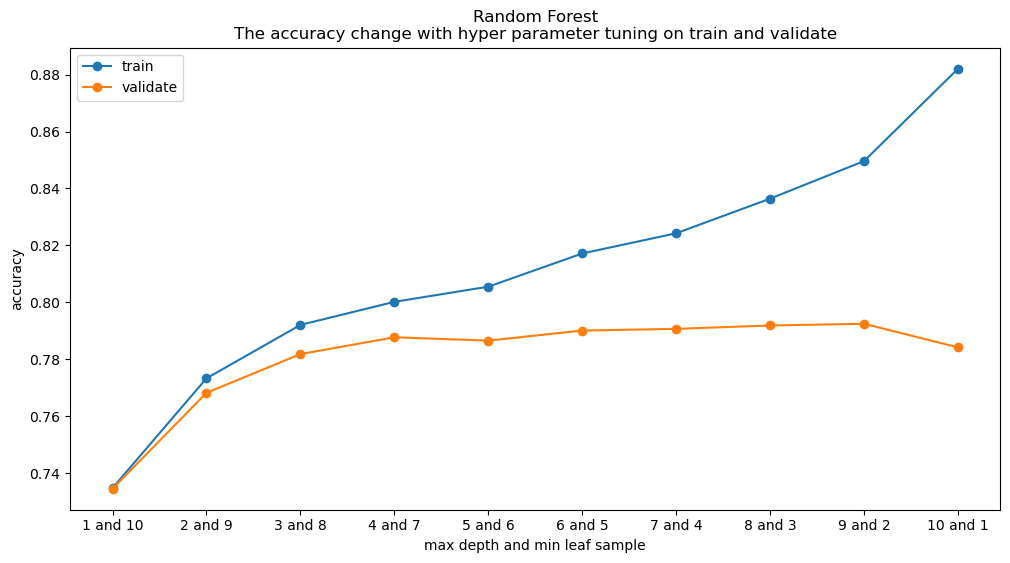

In [20]:
# Plots the train and validate for visual aid
m.plotForest(score_df)

In [21]:
# Max Depth of 3 and Min Leaf Sample of 8
m.get_rf(X_train, X_validate, y_train, y_validate)

 Accuracy of Random Forest on train data is 0.792036520415927
 Accuracy of Random Forest on train data is 0.781785925487877


Random Forest Model is still better than the baseline of 74.5%

## KNN Model

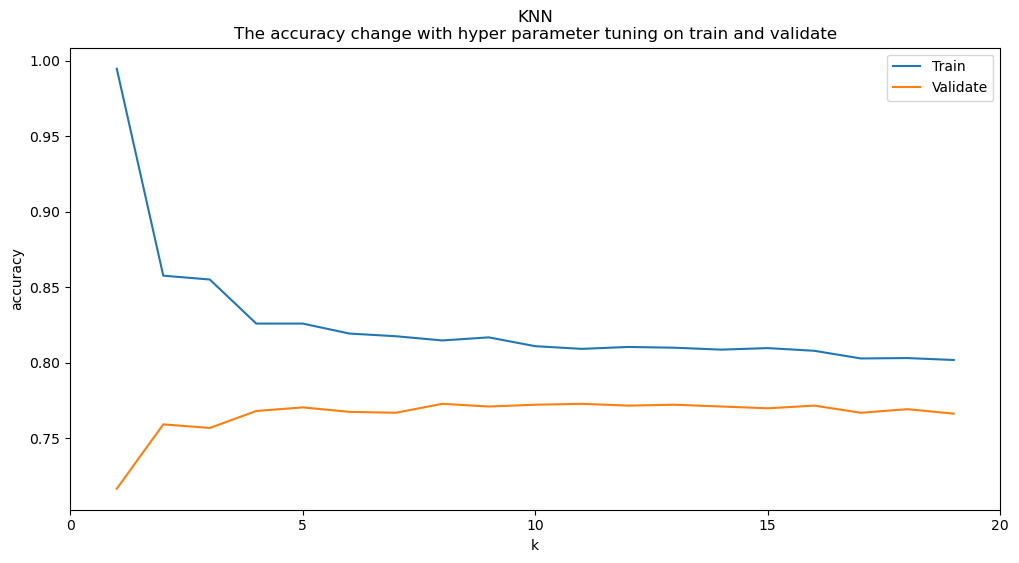

In [22]:
# Plots train and validate models for knn up to 20 neighbors
m.get_knn(X_train, X_validate, y_train, y_validate)

In [23]:
# Used 10 neighbors since the graph above shows that the results steady out
m.get_knn10(X_train, X_validate, y_train, y_validate)

 Accuracy of KNN on train data is 0.8110575703778848
 Accuracy of KNN on validate data is 0.7723240685984625


The KNN model is better than the baseline of 74.5%

## Logistic Regression Model

In [24]:
# gets the logistic regression accuracy results
m.get_logreg(X_train, X_validate, y_train, y_validate)

 Accuracy of Logistic Regression on train is 0.8072533603854932
 Accuracy of Logistic Regression on train is 0.7959787108219988


All models beat the baseline but the Logistic Regression didso with the least ammount of difference between the train and validate set.

### Test Model

* Out of the 3 Models, I ended up going with the Logistic Regression moder for the test set


In [25]:
# Time to use the test dataset
m.get_logreg_test(X_train, X_test, y_train, y_test)

Accuracy of Logistic Regression on test is 0.7863733144073811


The test data resulted in 4% more than the baseline in figuring out what customers are likely to churn.

## Conclusion

### Summary
* To summarize, the features used in these models work very well compared to the baseline to find what customers will churn.


### Recommendations

* I would recommend that somehow we push customers towards getting Online Security and Backup, Tech Support, and Device Protection.
* I would also recommend that customers are driven towards DSL and automatic Payments like Bank Transfer or Credit Card.


In [26]:
# This saves the results from the test into a csv
m.log_to_csv(X_train, X_test, y_train, y_test)

## README

Your README should contain all of the following elements:

* Title Gives the name of your project
* Project Description Describes what your project is and why it is important
* Project Goal Clearly states what your project sets out to do and how the information gained can be applied to the real world
* Initial Hypotheses Initial questions used to focus your project
* Project Plan Guides the reader through the different stages of the pipeline as they relate to your project
* Data Dictionary Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* Steps to Reproduce Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.